In [2]:
import os
from os.path import join
import numpy as np
import cv2
import matplotlib.pyplot as plt
from side_extractor import process_piece, plot_side_images
from functools import partial
import traceback
from separate_pieces import preprocess
from skimage import io

In [3]:
num_pieces = 11

In [4]:
def plot_grid(size, out_dict, *image_keys):
    h, w = size
    for idx, img_key in enumerate(image_keys, start=1):
        plt.subplot(h * 100 + w * 10 + idx)
        if img_key[0] == '_':
            plt.imshow(out_dict[img_key[1:]], cmap='gray')
        else:
            plt.imshow(out_dict[img_key])

10


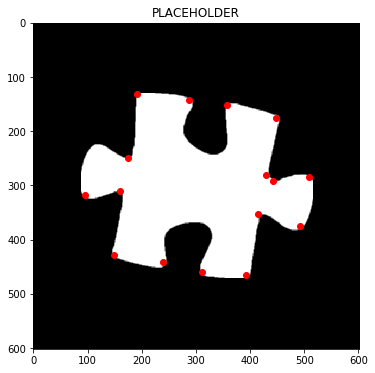

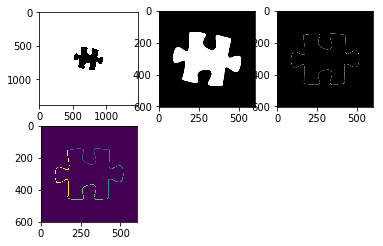

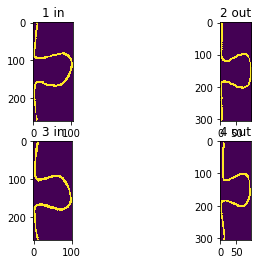

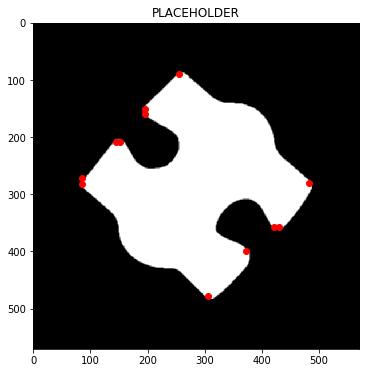

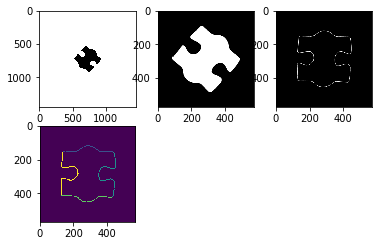

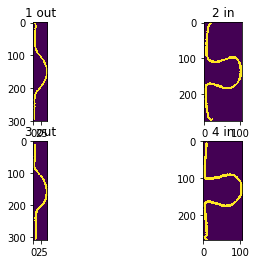

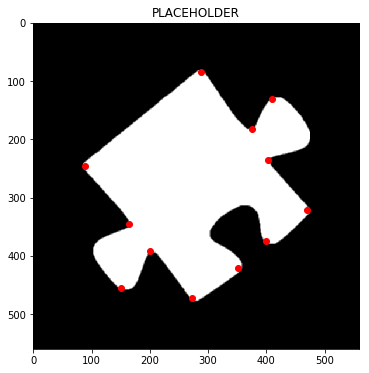

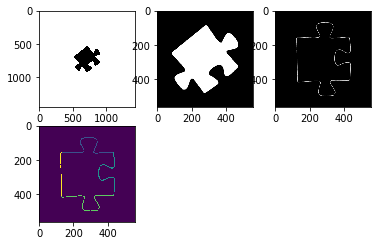

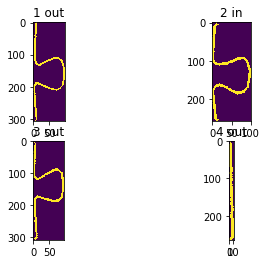

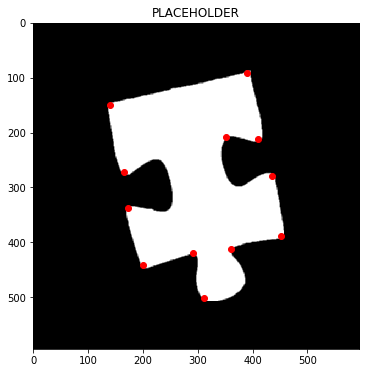

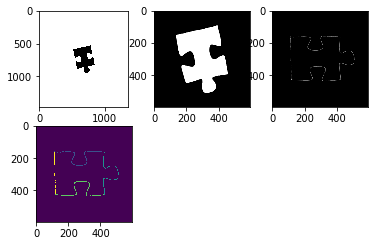

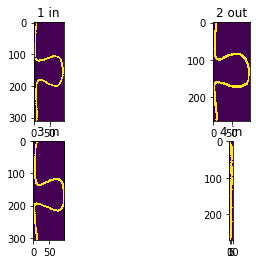

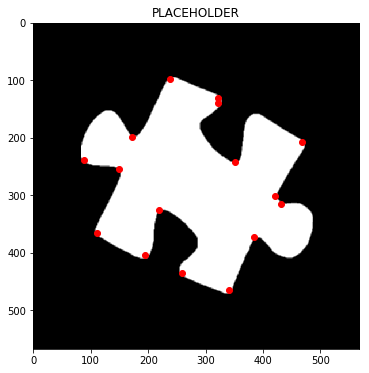

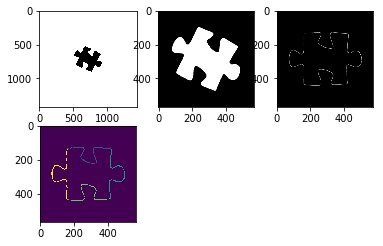

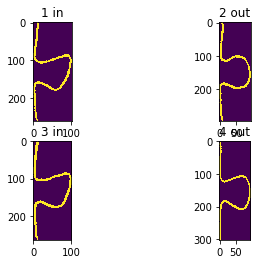

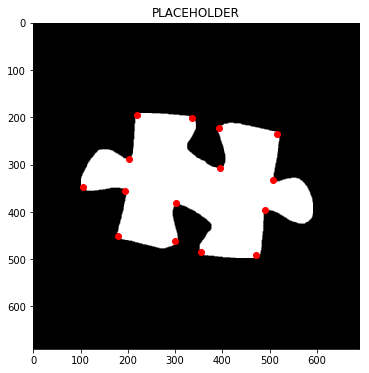

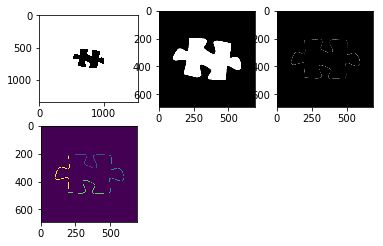

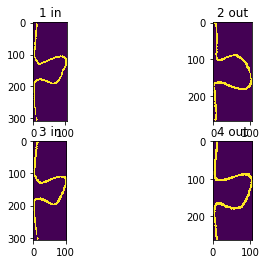

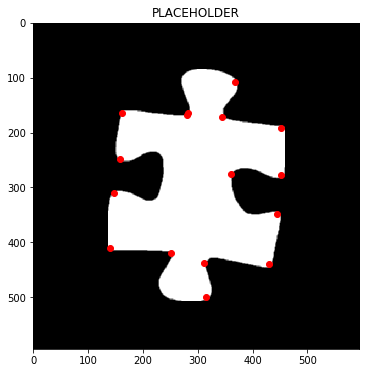

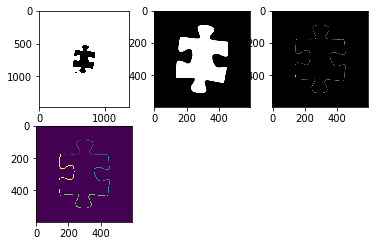

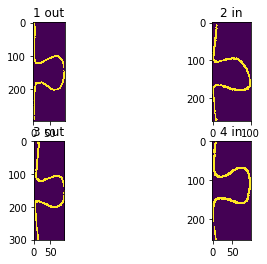

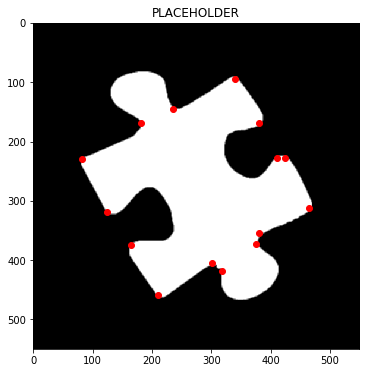

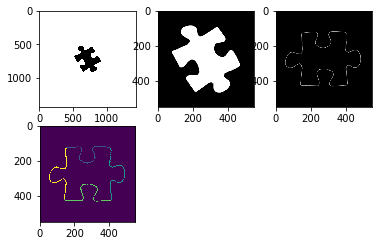

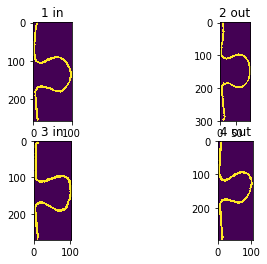

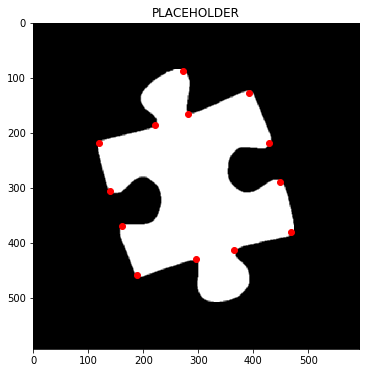

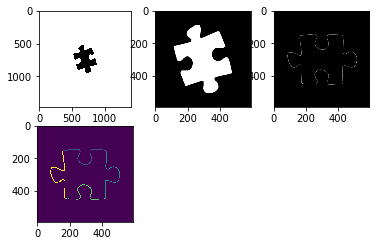

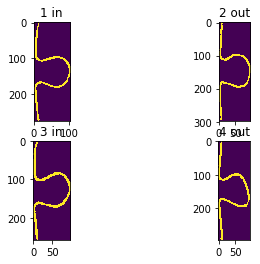

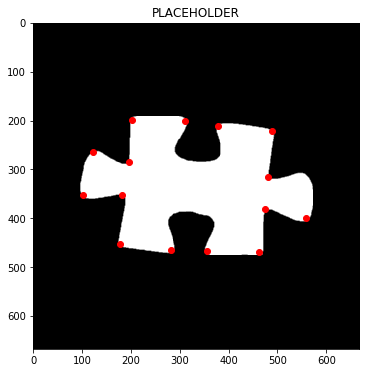

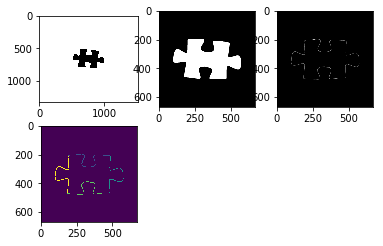

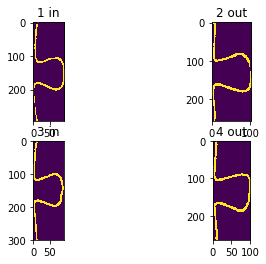

In [5]:
postprocess = partial(cv2.blur, ksize=(3, 3))
results = []
error_labels = []

img = io.imread("test_images/pic6.jpeg")
pieces = preprocess(img, num_pieces)
print(len(pieces))


for piece in pieces:
    
    out_dict = process_piece(piece, after_segmentation_func=postprocess, scale_factor=0.4, 
                             harris_block_size=5, harris_ksize=5,
                             corner_score_threshold=0.01, corner_minmax_threshold=100)
    
    plt.figure(figsize=(6, 6))
    plt.title("PLACEHOLDER")
    plt.imshow(out_dict['extracted'], cmap='gray')
    plt.scatter(out_dict['xy'][:, 0], out_dict['xy'][:, 1], color='red')
    #plt.colorbar()
    plt.show()
    
    if 'error' in out_dict:
        print("PLACEHOLDER", ':', out_dict['error'])
        error_labels.append("PLACEHOLDER")
        traceback.print_exc()
        continue
        
    else:
        
        plt.figure(figsize=(6, 6))
        plt.imshow(out_dict['class_image'])
        plot_grid((3, 3), out_dict, '_segmented', '_extracted', '_edges', 'class_image')
        plt.show()

        plot_side_images(out_dict['side_images'], out_dict['inout'])

        results.append({'side_images': out_dict['side_images'], 'inout': out_dict['inout']})

In [ ]:
to_ignore = ['D70']
for el in error_labels:
    labels.remove(el)

for label, result in zip(labels, results):
    
    if label in to_ignore:
        continue
    
    for i, (side_image, io) in enumerate(zip(result['side_images'], result['inout']), start=1):
        
        out_io = 'int' if io == 'in' else 'out'
        side_image = side_image * 255
        
        
        out_filename = "{0}_{1}_{2}.jpg".format(label, i, out_io)
        out_path = join('sides', out_filename)
        
        cv2.imwrite(out_path, side_image)

In [ ]:
img = io.imread("test_images/pic5.jpeg")
img = preprocess(img, num_pieces)[6]
plt.imshow(img)
plt.show()

In [ ]:
import skimage
import cv2
from skimage.filters import try_all_threshold
import side_extractor

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = side_extractor.segment_piece(gray)

gray = side_extractor.extract_piece(gray)
ret, labels = cv2.connectedComponents(gray)
connected_areas = [np.count_nonzero(labels == l) for l in range(1, ret)]
max_area_idx = np.argmax(connected_areas) + 1
gray[labels != max_area_idx] = 0
gray = 255 - gray
gray = side_extractor.extract_piece(gray)

kernel1 = np.ones((8,8),np.uint8)
closing1 = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel1)
kernel2 = np.ones((9,9),np.uint8)
closing2 = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel2)
kernel3 = np.ones((10,10),np.uint8)
closing3 = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel3)

plt.imshow(img)
plt.show()             
plt.imshow(gray)
plt.show()  
plt.imshow(closing1)
plt.show()  
plt.imshow(closing2)
plt.show()  
plt.imshow(closing3)
plt.show()  
      

# fig, ax = try_all_threshold(gray, figsize=(10, 8), verbose=False)
# plt.show()

In [ ]:
import skimage

img = io.imread("test_images/pic7.jpeg")
num_pieces = 4

gray = skimage.color.rgb2gray(img)
thresh = skimage.filters.threshold_otsu(gray)
binary = 255 * (gray < thresh)

labels = skimage.measure.label(binary)
props = skimage.measure.regionprops(labels)

regions = []

regions_diam = [region.equivalent_diameter for region in props]
regions_perim = [region.perimeter for region in props]
sorted_diam = np.sort(regions_diam)
sorted_perim = np.sort(regions_perim)

for i in range(1,15):
    print(sorted_diam[-i])
    print(sorted_perim[-i])
    
plt.imshow(binary)
plt.show()

Current Piece: 1 Other Piece: 2
Current piece side: 1 Other peice side: 1
Similarity Score: 46.67538730781231
-----------------------------------------------------------------------------
Current Piece: 1 Other Piece: 2
Current piece side: 1 Other peice side: 3
Similarity Score: 66.55223504530562
-----------------------------------------------------------------------------
Current Piece: 1 Other Piece: 3
Current piece side: 1 Other peice side: 1
Similarity Score: 14.008021703316757
-----------------------------------------------------------------------------
Current Piece: 1 Other Piece: 3
Current piece side: 1 Other peice side: 3
Similarity Score: 44.1974455643702
-----------------------------------------------------------------------------
Current Piece: 1 Other Piece: 4
Current piece side: 1 Other peice side: 2
Similarity Score: 32.521437348554194
-----------------------------------------------------------------------------
Current Piece: 1 Other Piece: 5
Current piece side: 1 Other

------------------------------Match found------------------------------
Piece number: 1
Piece Side: 4
Matching piece number: 7
Matching piece Side: 2
Similarity Score: 8.569314608731975with similarity threshold 10
Current Piece: 1 Other Piece: 7
Current piece side: 4 Other peice side: 4
Similarity Score: 24.22454787591194
-----------------------------------------------------------------------------
Current Piece: 1 Other Piece: 8
Current piece side: 4 Other peice side: 1
Similarity Score: 13.34842885856781
-----------------------------------------------------------------------------
Current Piece: 1 Other Piece: 8
Current piece side: 4 Other peice side: 3
Similarity Score: 53.9370354270301
-----------------------------------------------------------------------------
Current Piece: 1 Other Piece: 9
Current piece side: 4 Other peice side: 1
Similarity Score: 16.391188857360085
-----------------------------------------------------------------------------
Current Piece: 1 Other Piece: 9
Cu

/Users/vwang/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Current Piece: 2 Other Piece: 10
Current piece side: 3 Other peice side: 3
Similarity Score: 68.09989925033783
-----------------------------------------------------------------------------
Current Piece: 2 Other Piece: 3
Current piece side: 4 Other peice side: 1
Similarity Score: 401.4559274980109
-----------------------------------------------------------------------------
Current Piece: 2 Other Piece: 3
Current piece side: 4 Other peice side: 3
Similarity Score: 334.5339045714228
-----------------------------------------------------------------------------
Current Piece: 2 Other Piece: 4
Current piece side: 4 Other peice side: 2
Similarity Score: 7.127228810840592
-----------------------------------------------------------------------------
------------------------------Match found------------------------------
Piece number: 2
Piece Side: 4
Matching piece number: 4
Matching piece Side: 2
Similarity Score: 7.127228810840592with similarity threshold 10
Current Piece: 2 Other Piece: 5
C

Matching piece number: 9
Matching piece Side: 4
Similarity Score: 7.66600614297137with similarity threshold 10
Current Piece: 4 Other Piece: 10
Current piece side: 3 Other peice side: 2
Similarity Score: 65.18692849002309
-----------------------------------------------------------------------------
Current Piece: 4 Other Piece: 10
Current piece side: 3 Other peice side: 4
Similarity Score: 4.425165553135255
-----------------------------------------------------------------------------
------------------------------Match found------------------------------
Piece number: 4
Piece Side: 3
Matching piece number: 10
Matching piece Side: 4
Similarity Score: 4.425165553135255with similarity threshold 10
Current Piece: 5 Other Piece: 6
Current piece side: 1 Other peice side: 2
Similarity Score: 23.5778034061035
-----------------------------------------------------------------------------
Current Piece: 5 Other Piece: 6
Current piece side: 1 Other peice side: 4
Similarity Score: 15.33924753057308

------------------------------Match found------------------------------
Piece number: 6
Piece Side: 4
Matching piece number: 9
Matching piece Side: 3
Similarity Score: 8.197851735656403with similarity threshold 10
Current Piece: 6 Other Piece: 10
Current piece side: 4 Other peice side: 1
Similarity Score: 46.20043303436806
-----------------------------------------------------------------------------
Current Piece: 6 Other Piece: 10
Current piece side: 4 Other peice side: 3
Similarity Score: 4.453626406594955
-----------------------------------------------------------------------------
------------------------------Match found------------------------------
Piece number: 6
Piece Side: 4
Matching piece number: 10
Matching piece Side: 3
Similarity Score: 4.453626406594955with similarity threshold 10
Current Piece: 7 Other Piece: 8
Current piece side: 1 Other peice side: 1
Similarity Score: 13.583645700101023
-----------------------------------------------------------------------------
Curr

------------------------------Match found------------------------------
Piece number: 9
Piece Side: 3
Matching piece number: 10
Matching piece Side: 4
Similarity Score: 5.417148267781741with similarity threshold 10
Current Piece: 9 Other Piece: 10
Current piece side: 4 Other peice side: 1
Similarity Score: 42.87656539633724
-----------------------------------------------------------------------------
Current Piece: 9 Other Piece: 10
Current piece side: 4 Other peice side: 3
Similarity Score: 8.988363393475632
-----------------------------------------------------------------------------
------------------------------Match found------------------------------
Piece number: 9
Piece Side: 4
Matching piece number: 10
Matching piece Side: 3
Similarity Score: 8.988363393475632with similarity threshold 10


------------------------------Smallest Score------------------------------
2.652199431667787


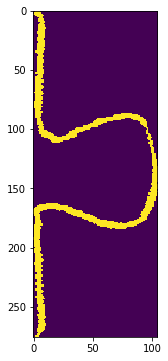

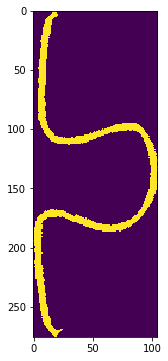

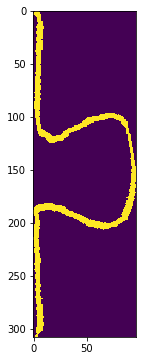

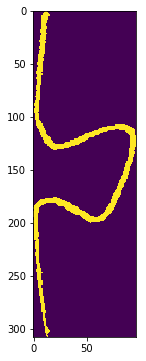

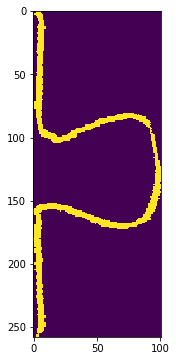

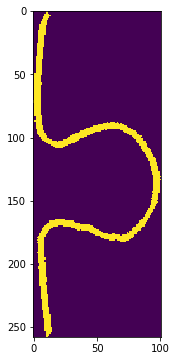

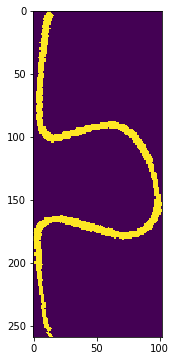

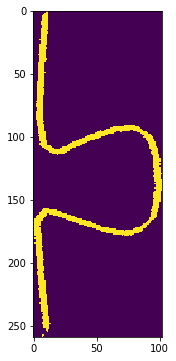

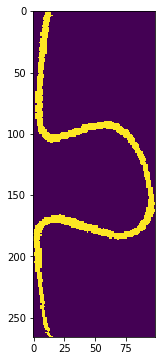

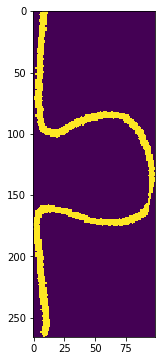

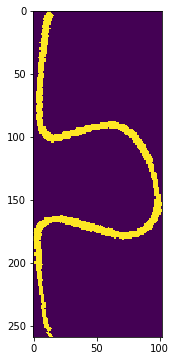

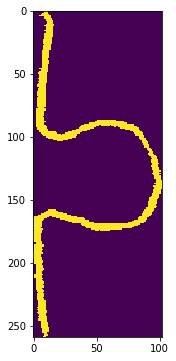

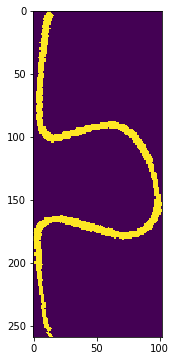

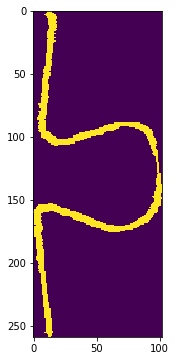

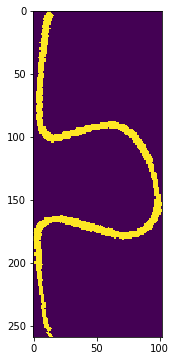

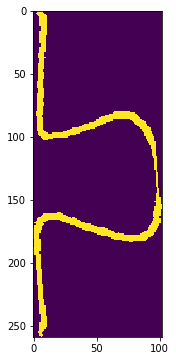

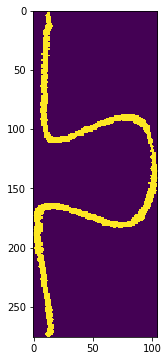

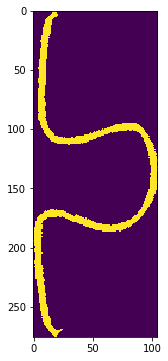

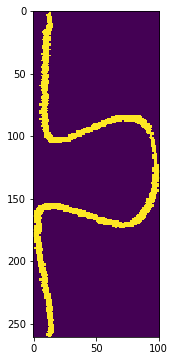

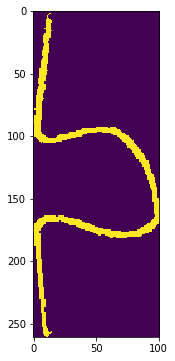

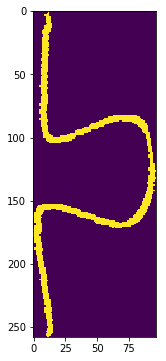

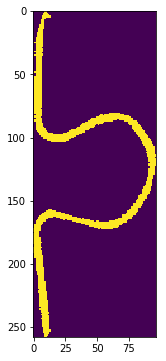

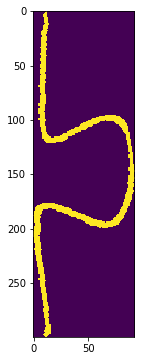

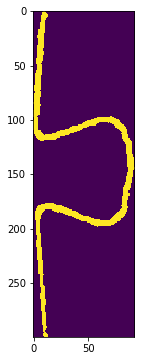

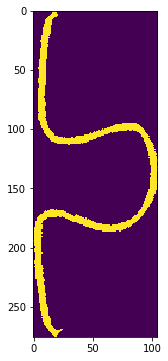

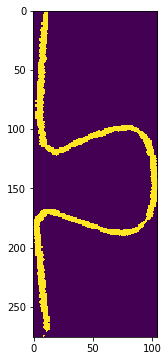

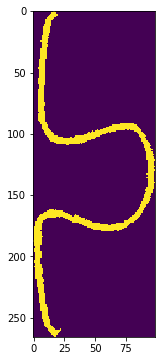

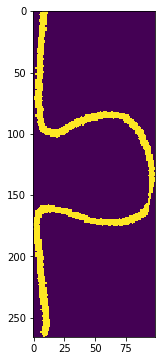

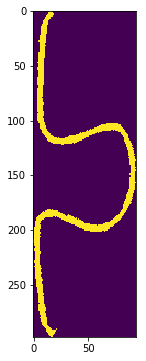

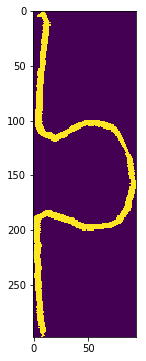

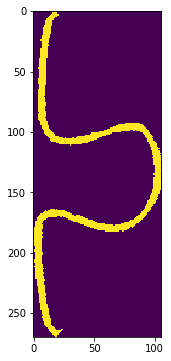

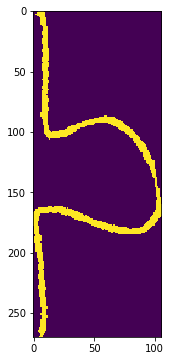

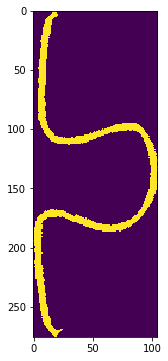

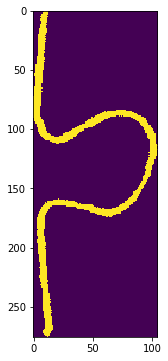

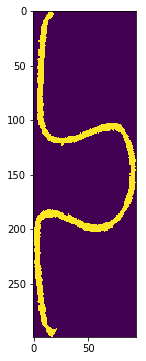

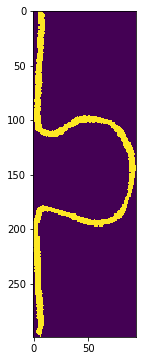

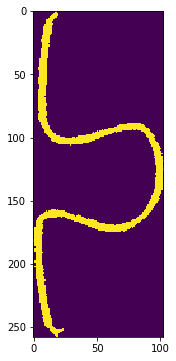

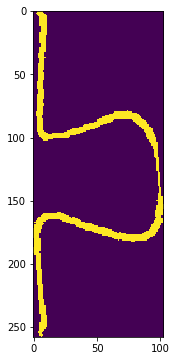

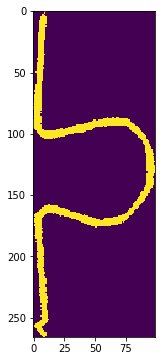

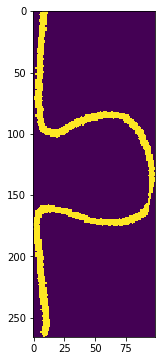

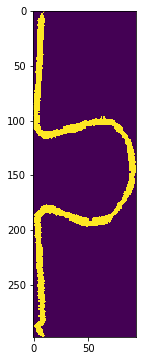

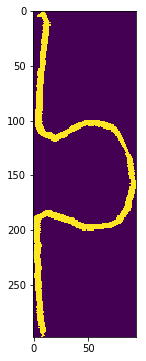

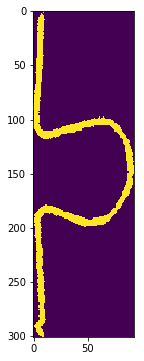

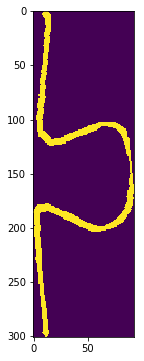

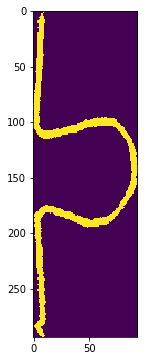

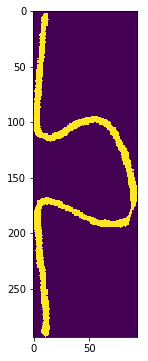

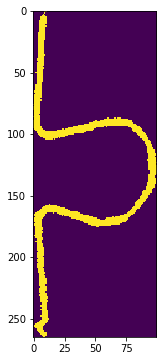

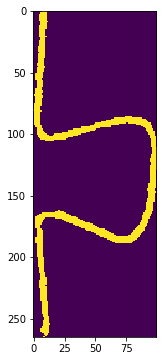

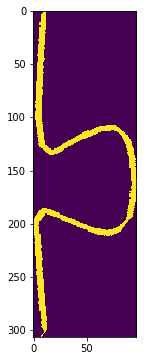

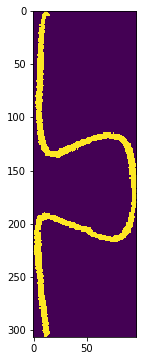

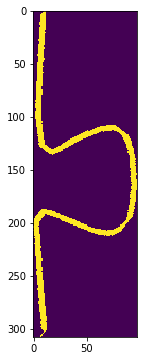

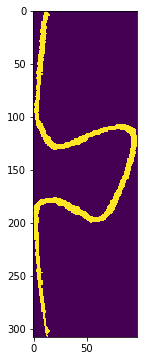

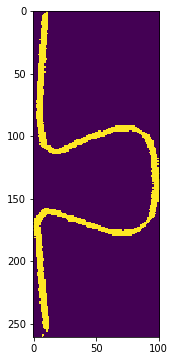

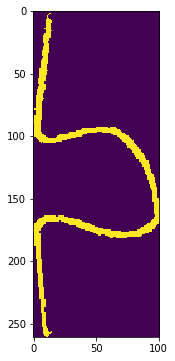

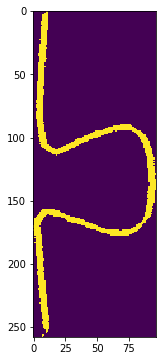

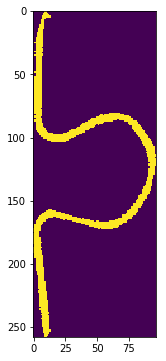

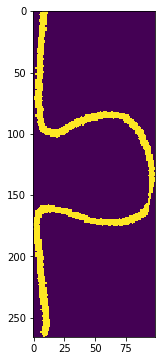

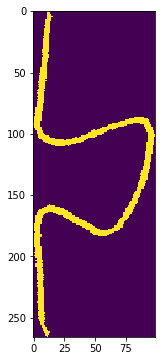

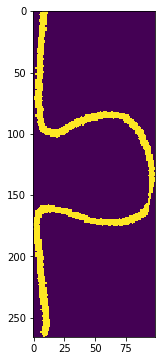

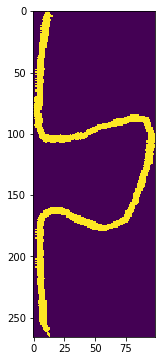

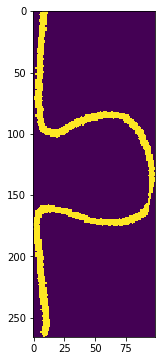

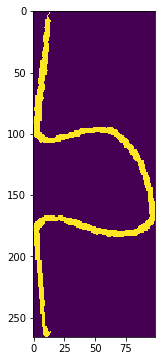

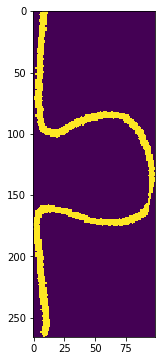

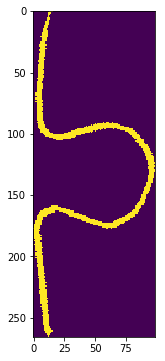

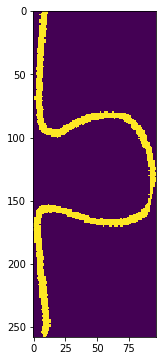

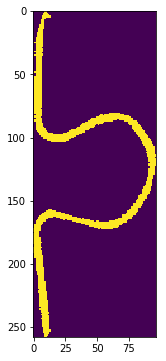

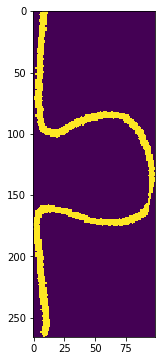

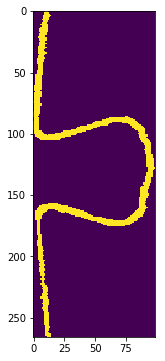

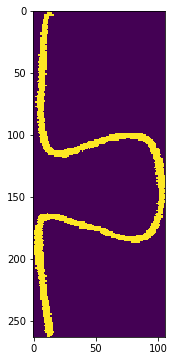

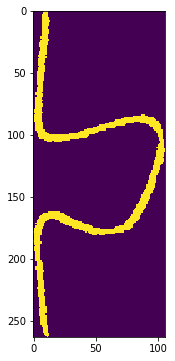

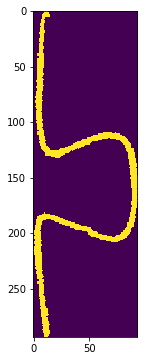

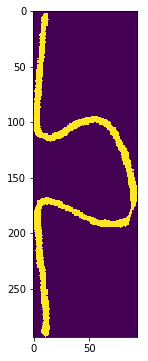

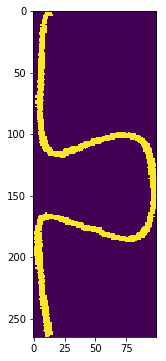

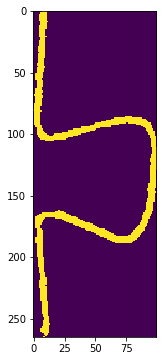

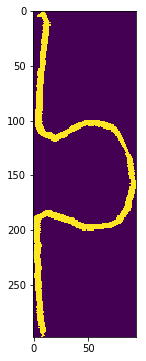

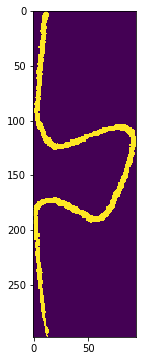

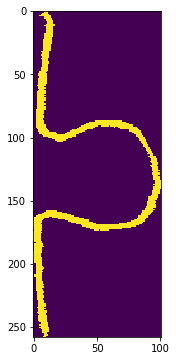

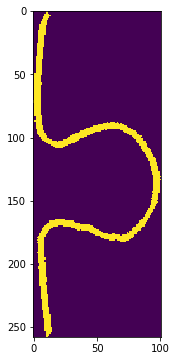

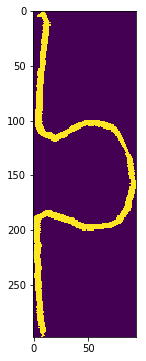

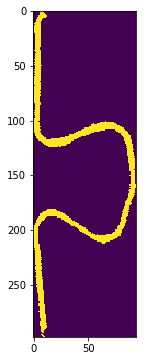

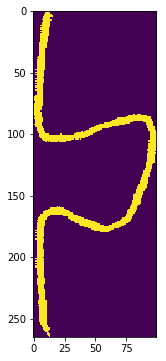

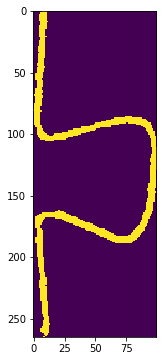

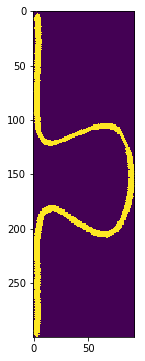

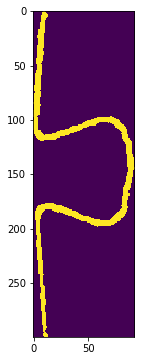

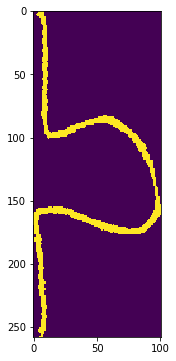

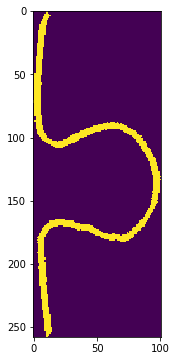

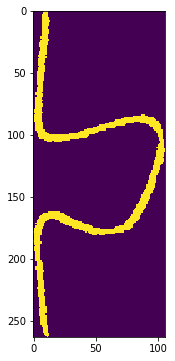

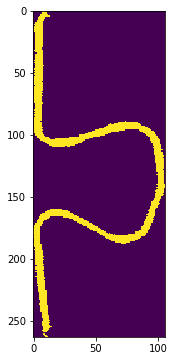

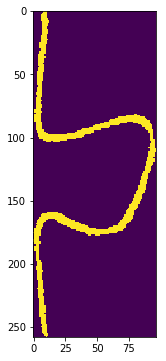

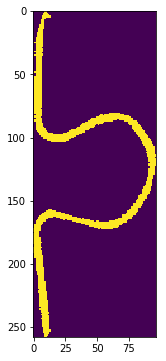

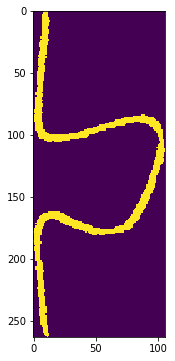

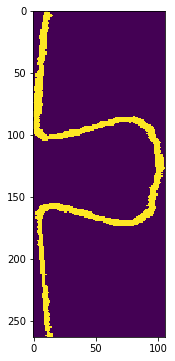

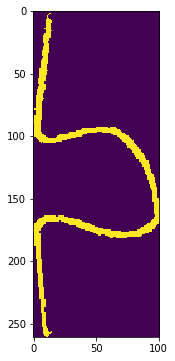

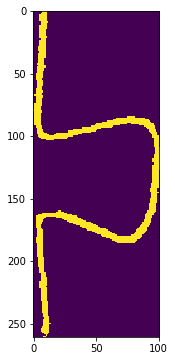

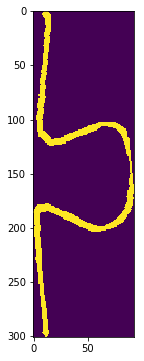

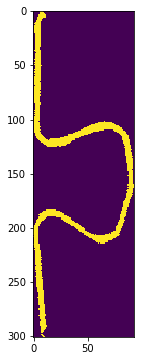

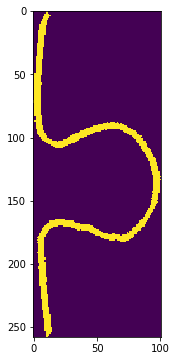

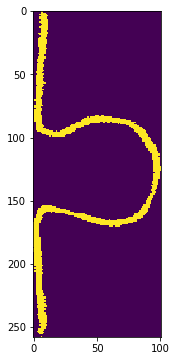

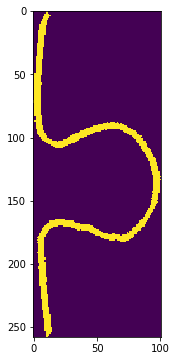

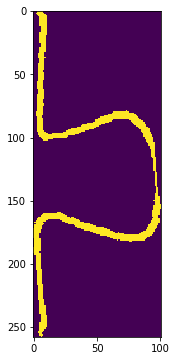

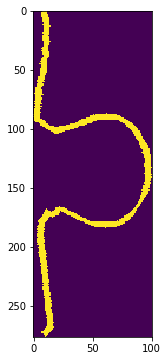

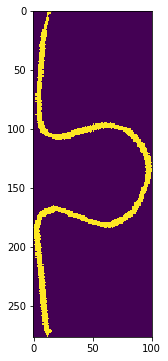

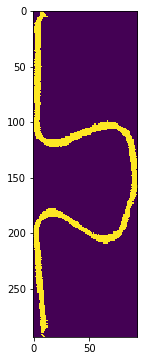

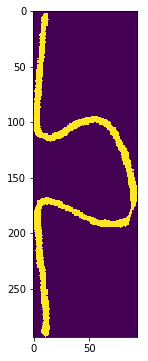

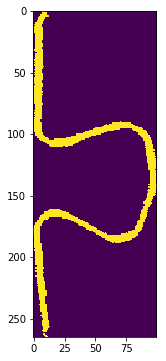

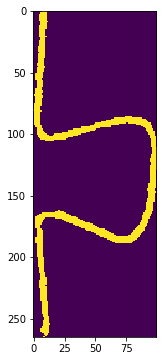

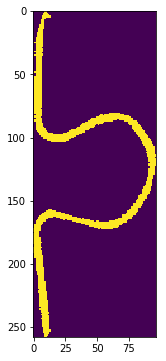

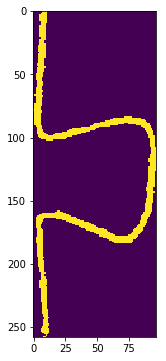

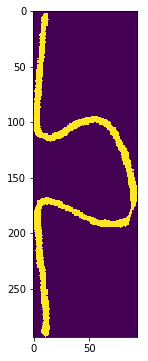

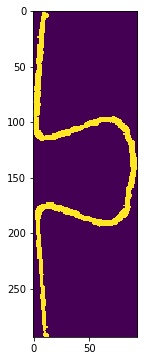

In [7]:
from skimage.morphology import skeletonize
from skimage.util import invert

def compute_similarity(side_image_1, side_image_2):
    ret = cv2.matchShapes(side_image_1, side_image_2, method=cv2.CONTOURS_MATCH_I1, parameter=0.0)
    return ret

# results[0]['side_images'][2] = cv2.resize(results[0]['side_images'][2], (results[3]['side_images'][1].shape[1], results[3]['side_images'][1].shape[0]))

# inverted_side_image_1 = invert(results[0]['side_images'][2]) / 255
# inverted_side_image_2 = invert(results[3]['side_images'][1]) / 255

# skeletonized_1 = skeletonize(inverted_side_image_1)
# skeletonized_2 = skeletonize(inverted_side_image_2)

# print(str(compute_similarity(results[0]['side_images'][2], results[3]['side_images'][1])))
# print(str(compute_similarity(skeletonized_1 * 255, skeletonized_2 * 255)))
# plt.figure(figsize=(6, 6))
# # plt.imshow(results[0]['side_images'][2])
# plt.imshow(skeletonized_1)
# plt.figure(figsize=(6, 6))
# plt.imshow(skeletonized_2)
# # plt.imshow(results[3]['side_images'][1])    

current_piece_no = 0
similarity_thresh = 10
stick_thresh = 15
matching_pieces = []
similarity_scores = []
for piece in results:
    current_piece_no += 1
    for side in range(4):
        other_piece_no = current_piece_no 
        for other_piece in results[current_piece_no:]:
            other_piece_no += 1
            relevant_sides = [other_side for other_side in range(4) if other_piece['inout'][other_side] != piece['inout'][side]]
            for other_side in relevant_sides:
                current_side_image = piece['side_images'][side]
                other_side_image = other_piece['side_images'][other_side]
                if current_side_image.shape[1] < stick_thresh or other_side_image.shape[1] < stick_thresh:
                    continue
                if current_side_image.size < other_side_image.size:
                    other_side_image = cv2.resize(other_side_image, (current_side_image.shape[1], current_side_image.shape[0]))
                else:
                    current_side_image = cv2.resize(current_side_image, (other_side_image.shape[1], other_side_image.shape[0])) 
                similarity_score = compute_similarity(current_side_image, other_side_image)
                similarity_scores.append(similarity_score)
                print("Current Piece: " + str(current_piece_no) + " Other Piece: " + str(other_piece_no))
                print("Current piece side: " + str(side + 1) + " Other peice side: " + str(other_side + 1))
                print("Similarity Score: " + str(similarity_score))
                print("-----------------------------------------------------------------------------")
                if similarity_score < similarity_thresh:
                    matching_pieces.append((piece, other_piece))
                    plt.figure(figsize=(6, 6))
                    plt.imshow(current_side_image)
                    print("------------------------------Match found------------------------------")
                    print("Piece number: " + str(current_piece_no))
                    print("Piece Side: " + str(side + 1))
                    plt.figure(figsize=(6, 6))
                    plt.imshow(other_side_image)
                    print("Matching piece number: " + str(other_piece_no))
                    print("Matching piece Side: " + str(other_side + 1))
                    print("Similarity Score: " + str(similarity_score) + "with similarity threshold " + str(similarity_thresh))

print("\n\n------------------------------Smallest Score------------------------------")
print(str(min(similarity_scores)))